
# <center> Applied Data Science Capstone</center> 

## Description:

#### This Project related to the final course (IBM Data Science) in Coursera.

we will use in this project data UK Traffic accidents from 2005-2015.we will analyze it and try to predict accidents severity using machine learning algorithms that we studied in this course. 

## Data Analyze:

### importing Libraries:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit

reading the two data csv files that we have and compain them in one pandas dataframe called "df_acc"

In [3]:
df_acc = pd.read_csv("C:/Users/Sliman/Downloads/Accidents0515.csv",index_col='Accident_Index')
vehicles = pd.read_csv("C:/Users/Sliman/Downloads/Vehicles0515.csv", error_bad_lines=False,
                     index_col='Accident_Index',warn_bad_lines=False)

df_acc = df_acc.join(vehicles, how='outer')
df_acc.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,3,...,1.0,15.0,2.0,74.0,10.0,-1.0,-1.0,-1.0,7.0,1.0
200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,4,...,1.0,1.0,1.0,42.0,7.0,8268.0,2.0,3.0,-1.0,-1.0
200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,5,...,1.0,1.0,1.0,35.0,6.0,8300.0,2.0,5.0,2.0,1.0
200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,5,...,1.0,15.0,1.0,62.0,9.0,1762.0,1.0,6.0,1.0,1.0
200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,6,...,1.0,15.0,2.0,49.0,8.0,1769.0,1.0,4.0,2.0,1.0


Then we will make a new column called "Date_time", that the compaination of the "date" and the "time" coulmns.In addition, we will convert it to (date_time) type to make it easier on us to use it with the other attributes.

In [4]:
df_acc['Date_time'] =  df_acc['Date'] +' '+ df_acc['Time']

#droping the undefined values i our DB were given the value (-1)
for i in df_acc.columns:
    df_acc = (df_acc[df_acc[i]!=-1])

In [5]:
df_acc['Date_time'].head()

Accident_Index
200501BS00007    13/01/2005 20:40
200501BS00010    15/01/2005 22:43
200501BS00011    15/01/2005 16:00
200501BS00012    16/01/2005 00:42
200501BS00014    25/01/2005 20:48
Name: Date_time, dtype: object

In [6]:
df_acc['Date_time'] = pd.to_datetime(df_acc.Date_time)
df_acc['Date_time'].head()

Accident_Index
200501BS00007   2005-01-13 20:40:00
200501BS00010   2005-01-15 22:43:00
200501BS00011   2005-01-15 16:00:00
200501BS00012   2005-01-16 00:42:00
200501BS00014   2005-01-25 20:48:00
Name: Date_time, dtype: datetime64[ns]

### Weekly Accident:
Here we will try to know what is the most day of the week have the highest number of accidents in the period between 2005-2015.

In [11]:
df_acc['days_num']=df_acc.Date_time.dt.dayofweek

acc_num_day=df_acc['days_num'].value_counts()

x=acc_num_day.index.values.tolist()
y=acc_num_day.values.tolist()

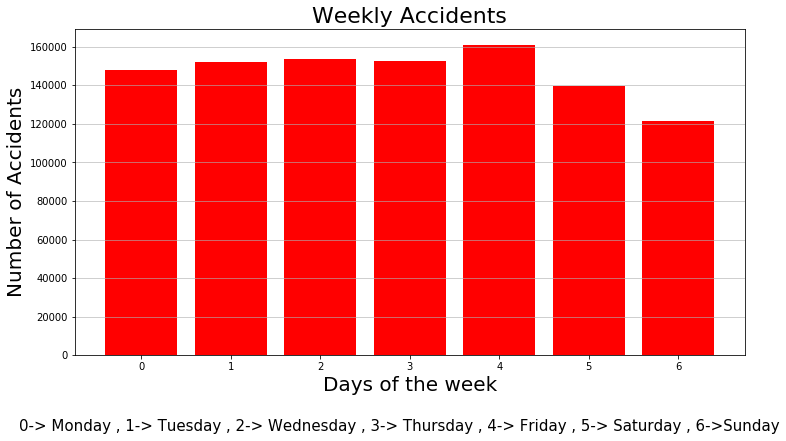

In [12]:
txt="0-> Monday , 1-> Tuesday , 2-> Wednesday , 3-> Thursday , 4-> Friday , 5-> Saturday , 6->Sunday"
fig=plt.figure(figsize=(12,6))
plt.bar(x,y,color='red')
plt.title('Weekly Accidents' , fontsize= 22)
plt.grid(False)
plt.grid(axis='y', alpha=0.75)
plt.ylabel('Number of Accidents' , fontsize = 20)
plt.xlabel('Days of the week',fontsize = 20)
fig.text(.5, -0.05, txt, ha='center',fontsize=15)
plt.show()


The bar chart gave us a glance on the day of the week that has the most accident rate and as we can see it is mostly in the working days, so it is reasonable.

### Time of the day:

we will try to find the specific time of the day that the accidents have occured.

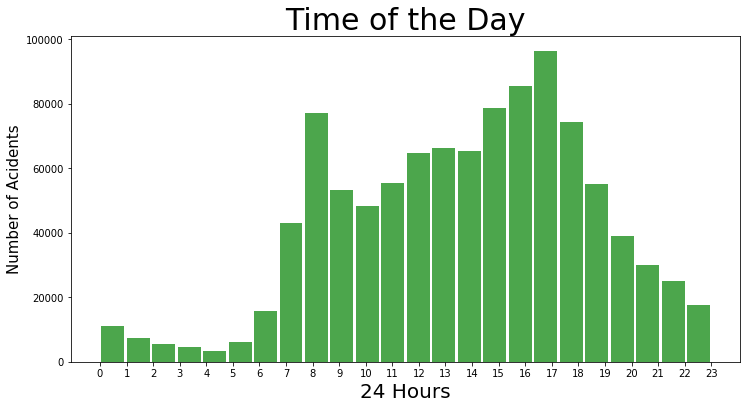

In [13]:
fig=plt.figure(figsize=(12,6))
df_acc.Date_time.dt.hour.hist(bins=24,rwidth=0.9,alpha =0.7, color= 'green')
x_ticks=list(range(24))
plt.title('Time of the Day',fontsize= 30)
plt.grid(False)
plt.xlabel('24 Hours' , fontsize = 20)
plt.ylabel('Number of Acidents' , fontsize = 15)
plt.xticks(x_ticks)
plt.show()

The histogram shows the highest number of accidents during the day.it happened at 17:00 (5:00 pm).So, it may be related to the time where the employees finish their work and return to their homes.

### Speed Limits:

Here we will study the speed limits for the roads and try to understand how it affect on the numbers of accidents.

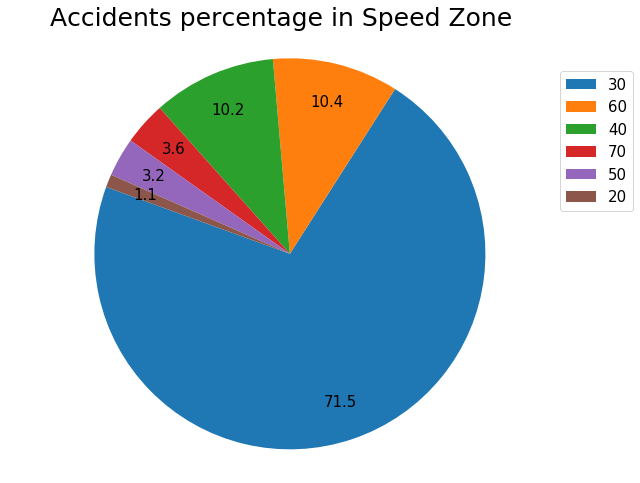

In [17]:
speed_zone_acc = df_acc.loc[df_acc['Speed_limit'].isin(['20' ,'30' ,'40' ,'50' ,'60' ,'70'])]
speed  = speed_zone_acc.Speed_limit.value_counts()

explode = (0.0, 0.0, 0.0 , 0.0 ,0.0,0.0) 
fig=plt.figure(figsize=(10,8))
plt.pie(speed.values,  labels=None, 
        autopct='%.1f',pctdistance=0.8, labeldistance=1.9 ,explode = explode, shadow=False, startangle=160,textprops={'fontsize': 15})
 
plt.axis('equal')
plt.legend(speed.index, bbox_to_anchor=(1,0.7), loc="center right", fontsize=15, 
           bbox_transform=plt.gcf().transFigure)
plt.figtext(.5,.9,'Accidents percentage in Speed Zone', fontsize=25, ha='center')
plt.show()

As a result for the pie chart, we can see clearly that most of the accidents happened on the roads that have a speed limits 30 Km/h.it have a proportion reach 71.5%. 
honestly, I was expecting the road with high speed or highways have more accidents rate than the other but it may be related to the roads that have the most car traffic.

### Monthly and Yearly number of accidents Comparison:

Testing the car accident rate through the months of each year and through each year and compare the results that we get.

In [18]:

df_acc['Month']=df_acc['Date_time'].dt.month
df_acc['Year']=df_acc['Date_time'].dt.year

acc_num_year=df_acc['Year'].value_counts()

x_year_sort=acc_num_year.sort_index()

x_year=x_year_sort.index.values.tolist()
y_year=x_year_sort.values.tolist()

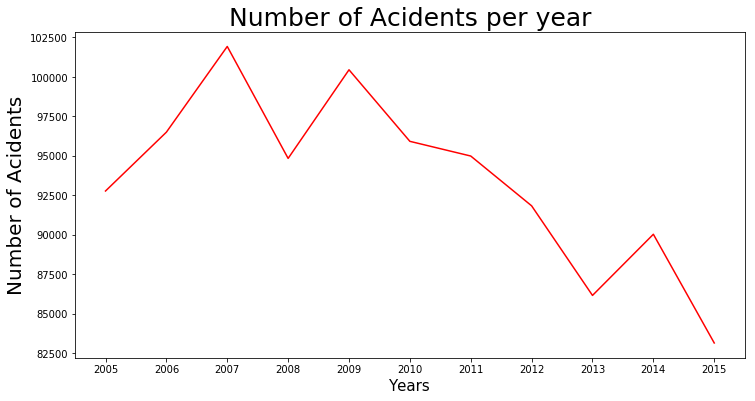

In [19]:
fig=plt.figure(figsize=(12,6))
plt.plot(x_year,y_year,color='red')
plt.title('Number of Acidents per year',fontsize=25)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Number of Acidents',fontsize=20)
plt.xticks(range(2005,2016))
plt.show()

The line chart shows how the number of accidents decreased dramatically throughout the 2005 - 2015. So we can guess that the government and the authorities have worked on the problem and trying to put rules to minimize the accident rate.

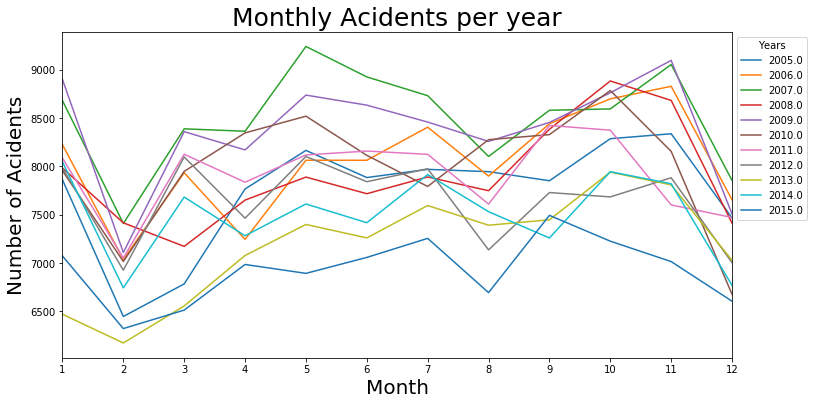

In [20]:
fig=plt.figure(figsize=(12,6))
acc_num_m_y=df_acc['Date_time'].groupby([df_acc['Month'],df_acc['Year']]).count().unstack().plot(kind='line',figsize = (12,6))
plt.xticks(range(1,13))
plt.title('Monthly Acidents per year',fontsize=25)
plt.ylabel('Number of Acidents',fontsize=20)
plt.xlabel('Month',fontsize=20)
plt.legend( title='Years', bbox_to_anchor=(1.12, 1), loc='upper right')
plt.show()

So, it seems like most of the years have the highest numbers in 10 - 11 months (Oct and Nov). 

### Correlation:

we will test the correlation between data attributes to see if there is any relation between them.

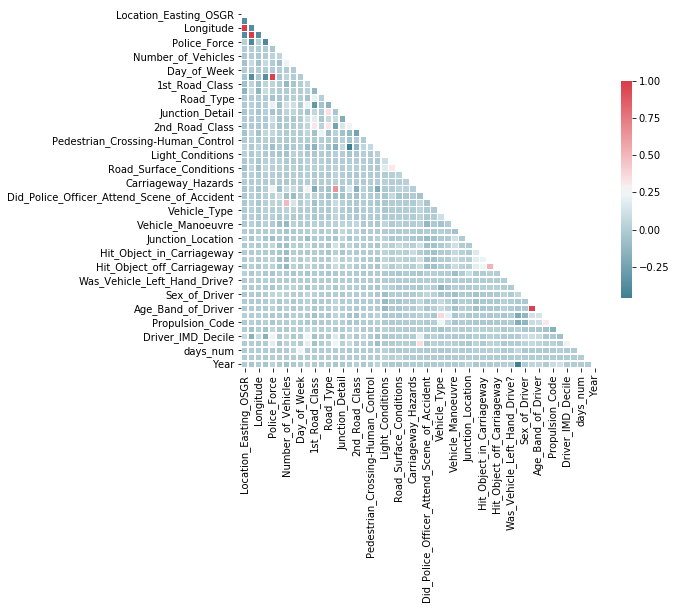

In [21]:
corr =  df_acc.corr()

#Generating a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Setting up the matplotlib figure
f, ax = plt.subplots(figsize=(8,8))

#Generating a custom diverging colormap
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()

As shown in the figure that represents a heat map for the correlation between the features of the database. There are not many correlations that could help us during the process. We can see that there is a strong positive correlation between Local_Authority_(District) and Police_force but it will not help us in our study.There is another strong positive correlation between Urban_or_Rural_Areas and Speed_limits we can use it.

## Machine Learning:

### Data processig and Scaling:

we will prepare our data to be able to apply machine learning algorithms and study the results we will get.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss

In [15]:
X = df_acc[['Did_Police_Officer_Attend_Scene_of_Accident' , 'Age_of_Driver' ,'Vehicle_Type', 'Age_of_Vehicle','Engine_Capacity_(CC)','Day_of_Week' , 'Weather_Conditions' , 'Road_Surface_Conditions'
                          , 'Light_Conditions', 'Sex_of_Driver' ,'Speed_limit']]

Y = df_acc['Accident_Severity']

X = X.fillna(X.mean())

X_array= np.asarray(X)
Y_array= np.asarray(Y)

### Normalizing the input Data:

In [24]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [25]:
# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.20, random_state=99)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)                                              

Train set: (822872, 11) (822872,)
Test set: (205718, 11) (205718,)


### we will use two ML models trying to predict accidents severity in the future and test the accuracy for each model. 

### 1-Logistic Regression:

In [26]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

In [27]:
acc_severity = LR.predict(X_test)
acc_severity

array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

In [28]:
acc_prob = LR.predict_proba(X_test)
acc_prob

array([[  7.37967168e-03,   9.14475628e-02,   9.01172766e-01],
       [  1.07050357e-02,   1.53059861e-01,   8.36235103e-01],
       [  2.17494735e-03,   4.40968676e-02,   9.53728185e-01],
       ..., 
       [  4.92284687e-03,   1.45655608e-01,   8.49421546e-01],
       [  6.63852287e-04,   3.37288327e-02,   9.65607315e-01],
       [  1.19842481e-02,   1.58346972e-01,   8.29668780e-01]])

### accuracy for logistic Regression model:

#### Jaccard index:

In [29]:
from sklearn.metrics import jaccard_similarity_score
print("The Accuracy for our ML model (Logistic Regression) using Jaccard similarity score is :", 
      round(jaccard_similarity_score(y_test, acc_severity)*100), "%")

The Accuracy for our ML model (Logistic Regression) using Jaccard similarity score is : 88.0 %


#### Log Loss:

In [30]:
print("The Accuracy for our ML model (Logistic Regression) using Log Loss is :",
      round(log_loss(y_test, acc_prob)*100), "%")

The Accuracy for our ML model (Logistic Regression) using Log Loss is : 38.0 %


In [31]:
print (classification_report(y_test, acc_severity))

             precision    recall  f1-score   support

          1       0.00      0.00      0.00      1507
          2       0.00      0.00      0.00     23102
          3       0.88      1.00      0.94    181109

avg / total       0.78      0.88      0.82    205718



C:\Users\Sliman\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 2- Decision Tree:

In [32]:
acc_sev_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
acc_sev_tree.fit(X_train,y_train)
predTree = acc_sev_tree.predict(X_test)
predTree

array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

### accuracy for Decision tree model:

In [33]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", round(metrics.accuracy_score(y_test, predTree)*100), "%")

DecisionTrees's Accuracy:  88.0 %


## Conclusion:
As we saw, we could use both algorithms to predict car accidents severity in the UK based on the data that we have from 2005 – 2015.

## Some Recommendations:
After we reviewed the data and analyzed it, there are a lot of factors that could help the authorities to reduce the number of car accidents such as the age of the driver, the day of the week, hours of the day, road condition and specific areas or locations that have the most accidents rate.